<a href="https://colab.research.google.com/github/yami-0812/Machine-Learning-Notebook/blob/main/Hands_language.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [2]:
from keras.models import load_model
from keras.preprocessing import image
import numpy as np
from os import listdir
from os.path import isfile, join
from keras.preprocessing.image import ImageDataGenerator

In [3]:
train_data_dir= '/content/gdrive/My Drive/handLanguage'
validation_data_dir= '/content/gdrive/My Drive/handLanguage'

In [4]:
train_datagen=ImageDataGenerator(rescale=1/255)
val_datagen=ImageDataGenerator(rescale=1/255)

In [5]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir, # The directory where the train data is located
    target_size=(224, 224), # Reshape the image to 224 by 224 pixels. This is important because it makes sure all images are the same size.
    batch_size=32, # We will take images in batches of 32.
    color_mode='rgb',
    class_mode='sparse') # The classification is not binary.

validation_generator = val_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(224, 224),
    batch_size=32,
    color_mode='rgb',
    class_mode='sparse')

Found 2515 images belonging to 36 classes.
Found 2515 images belonging to 36 classes.


In [6]:
num_classes=(len(train_generator.class_indices))
print(num_classes)

36


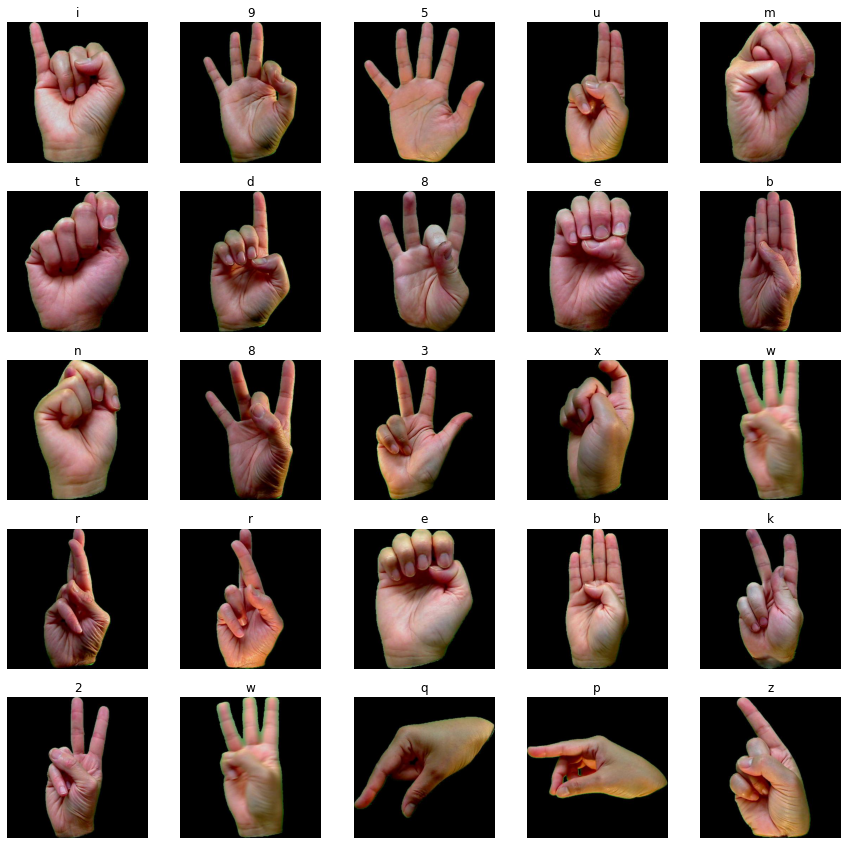

In [7]:
%matplotlib inline
from matplotlib import pyplot as plt
import random
import os
from tensorflow.keras import backend
import matplotlib.image as mpimg

def display_random_grid(ncols=5, ds_path=train_data_dir):
    fig, ax = plt.subplots(ncols=ncols, nrows=ncols, figsize=(15, 15))
    
    for i in range(ncols):
        for j in range(ncols):
            handLanguage = random.choice(os.listdir(ds_path))
            random_sign_path = random.choice(os.listdir(ds_path + '/'+ handLanguage))
            random_sign = mpimg.imread(ds_path + '/' + handLanguage + '/' + random_sign_path)
            ax[i, j].imshow(random_sign)
            ax[i, j].set_title(handLanguage)
            ax[i, j].axis('off')
            
display_random_grid()

In [8]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPool2D
from keras.layers import BatchNormalization
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout

classifier= Sequential()
# 1 layer
classifier.add(Convolution2D(512, kernel_size=(3, 3), strides=(1, 1), input_shape = (224, 224, 3), activation='relu'))
classifier.add(MaxPool2D((2,2)))
#classifier.add(BatchNormalization())
# 2 layer
classifier.add(Convolution2D(512, kernel_size=(3, 3), strides=(1, 1), activation='relu'))
classifier.add(MaxPool2D((2,2)))
#classifier.add(BatchNormalization())
# 3 layer
classifier.add(Convolution2D(256, kernel_size=(3, 3), strides=(1, 1), activation='relu'))
classifier.add(MaxPool2D((2,2)))
#classifier.add(BatchNormalization())
# STEP--3 FLattening
classifier.add(Flatten())

classifier.add(Dense(128, activation='relu'))
#classifier.add(Dropout(0.5))
classifier.add(Dense(num_classes, activation='softmax'))

classifier.compile(loss='sparse_categorical_crossentropy', optimizer = 'adam', metrics=["accuracy"])


In [9]:
import time
# Measuring the time taken by the model to train
StartTime=time.time()

# Starting the model training
classifier.fit(
                    train_generator,
                    steps_per_epoch=10,
                    epochs=10,
                    validation_data=validation_generator,
                    validation_steps=2)


EndTime=time.time()
print("############### Total Time Taken: ", round((EndTime-StartTime)/60), 'Minutes #############')

Epoch 1/10
10/10 [==============================] - 1210s 119s/step - loss: 3.7919 - accuracy: 0.0817 - val_loss: 2.6845 - val_accuracy: 0.1875
Epoch 2/10
10/10 [==============================] - 1192s 120s/step - loss: 2.0149 - accuracy: 0.4204 - val_loss: 0.8132 - val_accuracy: 0.7031
Epoch 3/10
10/10 [==============================] - 1207s 121s/step - loss: 1.0101 - accuracy: 0.7021 - val_loss: 0.2957 - val_accuracy: 0.9219
Epoch 4/10
10/10 [==============================] - 1208s 121s/step - loss: 0.7033 - accuracy: 0.8020 - val_loss: 0.5894 - val_accuracy: 0.8281
Epoch 5/10
10/10 [==============================] - 1168s 117s/step - loss: 0.4266 - accuracy: 0.8831 - val_loss: 0.4666 - val_accuracy: 0.8438
Epoch 6/10
10/10 [==============================] - 1207s 121s/step - loss: 0.3600 - accuracy: 0.8963 - val_loss: 0.1617 - val_accuracy: 0.9531
Epoch 7/10
10/10 [==============================] - 1207s 122s/step - loss: 0.2922 - accuracy: 0.9203 - val_loss: 0.4332 - val_accuracy:

In [13]:
TrainClasses=train_generator.class_indices
TrainClasses

{'0': 0,
 '1': 1,
 '2': 2,
 '3': 3,
 '4': 4,
 '5': 5,
 '6': 6,
 '7': 7,
 '8': 8,
 '9': 9,
 'a': 10,
 'b': 11,
 'c': 12,
 'd': 13,
 'e': 14,
 'f': 15,
 'g': 16,
 'h': 17,
 'i': 18,
 'j': 19,
 'k': 20,
 'l': 21,
 'm': 22,
 'n': 23,
 'o': 24,
 'p': 25,
 'q': 26,
 'r': 27,
 's': 28,
 't': 29,
 'u': 30,
 'v': 31,
 'w': 32,
 'x': 33,
 'y': 34,
 'z': 35}

In [14]:
'''#################### Creating lookup table for all faces ##############################'''
# class_indices have the numeric tag for each face
TrainClasses=train_generator.class_indices

# Storing the face and the numeric tag for future reference
ResultMap={}
for faceValue,faceName in zip(TrainClasses.values(),TrainClasses.keys()):
    ResultMap[faceValue]=faceName

import pickle
with open("/content/gdrive/My Drive/handLanguage/ResultsMap.pkl",'wb') as f:
    pickle.dump(ResultMap, f,pickle.HIGHEST_PROTOCOL)
    
print("Mapping of Face and its ID",ResultMap)

# The number of neurons for the output layer is equal to the number of faces
OutputNeurons=len(ResultMap)
print('\n The Number of output neurons: ', OutputNeurons)

Mapping of Face and its ID {0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8', 9: '9', 10: 'a', 11: 'b', 12: 'c', 13: 'd', 14: 'e', 15: 'f', 16: 'g', 17: 'h', 18: 'i', 19: 'j', 20: 'k', 21: 'l', 22: 'm', 23: 'n', 24: 'o', 25: 'p', 26: 'q', 27: 'r', 28: 's', 29: 't', 30: 'u', 31: 'v', 32: 'w', 33: 'x', 34: 'y', 35: 'z'}

 The Number of output neurons:  36


In [15]:
import numpy as np
from keras.preprocessing import image

testImage='/content/gdrive/My Drive/test.png'
test_image=image.load_img(testImage,target_size=(224, 224))
test_image=image.img_to_array(test_image)

test_image=np.expand_dims(test_image,axis=0)

result=classifier.predict(test_image,verbose=0)
#print(training_set.class_indices)

print('####'*10)
print('Prediction is: ',ResultMap[np.argmax(result)])

########################################
Prediction is:  j


In [16]:
testImage='/content/gdrive/My Drive/test1.png'
test_image=image.load_img(testImage,target_size=(224, 224))
test_image=image.img_to_array(test_image)

test_image=np.expand_dims(test_image,axis=0)

result=classifier.predict(test_image,verbose=0)
#print(training_set.class_indices)

print('####'*10)
print('Prediction is: ',ResultMap[np.argmax(result)])

########################################
Prediction is:  z


In [18]:
testImage='/content/gdrive/My Drive/test2.jpeg'
test_image=image.load_img(testImage,target_size=(224, 224))
test_image=image.img_to_array(test_image)

test_image=np.expand_dims(test_image,axis=0)

result=classifier.predict(test_image,verbose=0)
#print(training_set.class_indices)

print('####'*10)
print('Prediction is: ',ResultMap[np.argmax(result)])

########################################
Prediction is:  3


# thank you